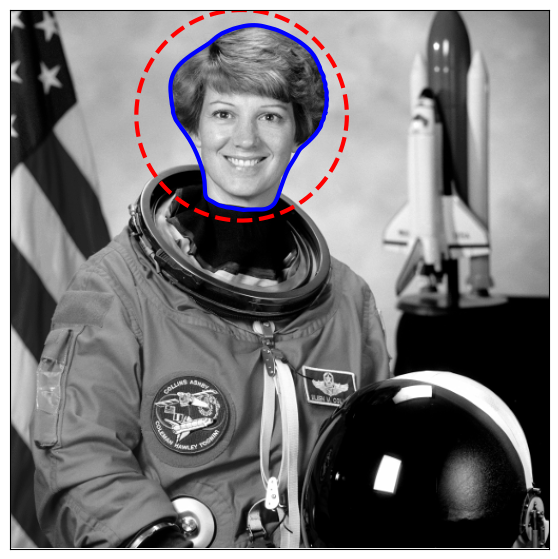

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage import data
from skimage.filters import gaussian
from skimage.segmentation import active_contour


img = data.astronaut()
img = rgb2gray(img)

s = np.linspace(0, 2 * np.pi, 400)
r = 100 + 100 * np.sin(s)
c = 220 + 100 * np.cos(s)
init = np.array([r, c]).T

snake = active_contour(
    gaussian(img, sigma=3, preserve_range=False),
    init,
    alpha=0.015,
    beta=10,
    gamma=0.001,
)

fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(img, cmap=plt.cm.gray)
ax.plot(init[:, 1], init[:, 0], '--r', lw=3)
ax.plot(snake[:, 1], snake[:, 0], '-b', lw=3)
ax.set_xticks([]), ax.set_yticks([])
ax.axis([0, img.shape[1], img.shape[0], 0])

plt.show()

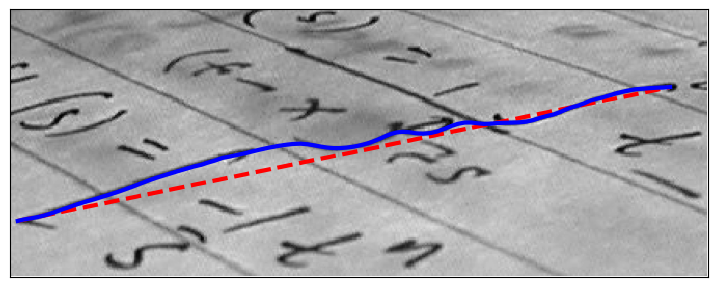

In [2]:
img = data.text()

r = np.linspace(136, 50, 100)
c = np.linspace(5, 424, 100)
init = np.array([r, c]).T

snake = active_contour(
    gaussian(img, sigma=1, preserve_range=False),
    init,
    boundary_condition='fixed',
    alpha=0.1,
    beta=1.0,
    w_line=-5,
    w_edge=0,
    gamma=0.1,
)

fig, ax = plt.subplots(figsize=(9, 5))
ax.imshow(img, cmap=plt.cm.gray)
ax.plot(init[:, 1], init[:, 0], '--r', lw=3)
ax.plot(snake[:, 1], snake[:, 0], '-b', lw=3)
ax.set_xticks([]), ax.set_yticks([])
ax.axis([0, img.shape[1], img.shape[0], 0])

plt.show()